>activate 00ncku
>python3.7.0
>tensoflow 1.15.5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from platform import python_version
import tensorflow as tf
print('python version:'+python_version())
print('tensorflow version:'+tf.__version__)

python version:3.10.12
tensorflow version:2.15.0


---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = '/content/drive/MyDrive/TrafficSign Classifier Project/traffic-signs-data/train.p'
validation_file='/content/drive/MyDrive/TrafficSign Classifier Project/traffic-signs-data/valid.p'
testing_file = '/content/drive/MyDrive/TrafficSign Classifier Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results.

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value.
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import random
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

n_valid=X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2],X_train.shape[3]]

# TODO: How many unique classes/labels there are in the dataset.
def getLabelsCount(labels):
    d = dict(zip(labels, [0] * len(labels)))
    for x in labels:
        d[x] += 1
    return d
signsDicts = getLabelsCount(y_train)
n_classes = len(signsDicts)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


In [5]:
!pip install pandas

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0. Speed limit (20km/h) - Samples: 180


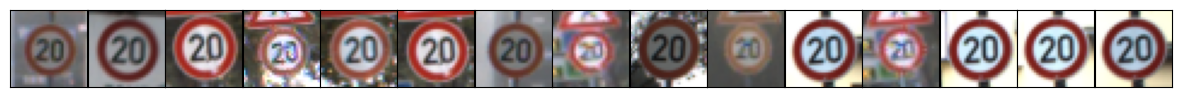

----------------------------------------------------------------------------

1. Speed limit (30km/h) - Samples: 1980


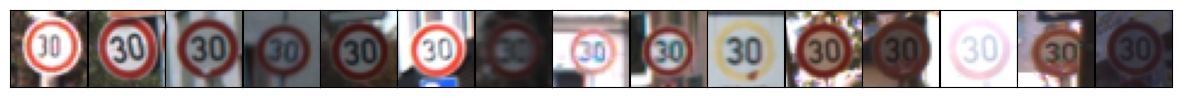

----------------------------------------------------------------------------

2. Speed limit (50km/h) - Samples: 2010


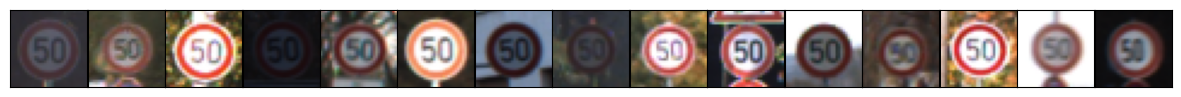

----------------------------------------------------------------------------

3. Speed limit (60km/h) - Samples: 1260


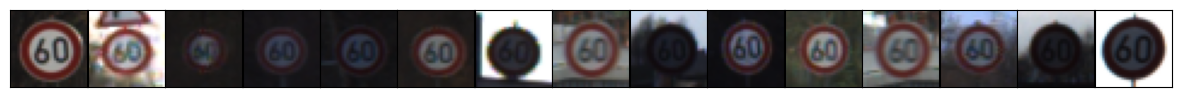

----------------------------------------------------------------------------

4. Speed limit (70km/h) - Samples: 1770


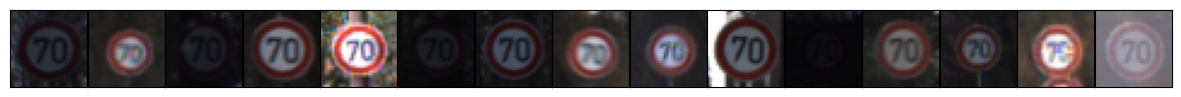

----------------------------------------------------------------------------

5. Speed limit (80km/h) - Samples: 1650


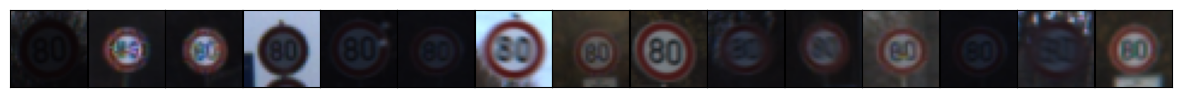

----------------------------------------------------------------------------

6. End of speed limit (80km/h) - Samples: 360


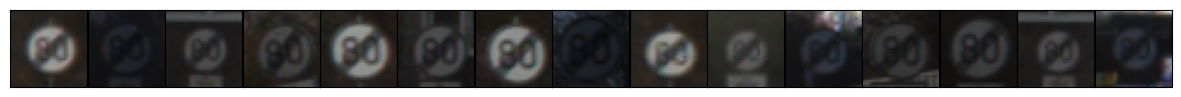

----------------------------------------------------------------------------

7. Speed limit (100km/h) - Samples: 1290


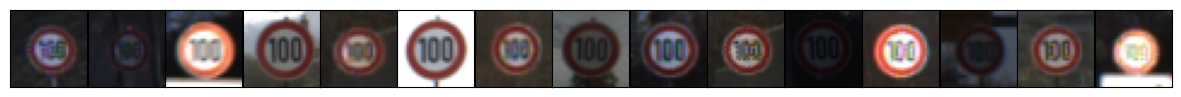

----------------------------------------------------------------------------

8. Speed limit (120km/h) - Samples: 1260


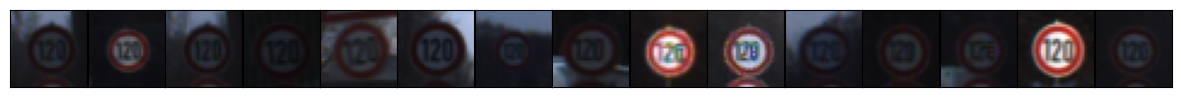

----------------------------------------------------------------------------

9. No passing - Samples: 1320


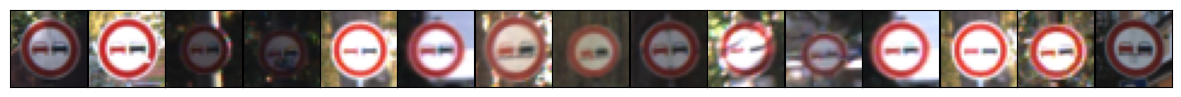

----------------------------------------------------------------------------

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


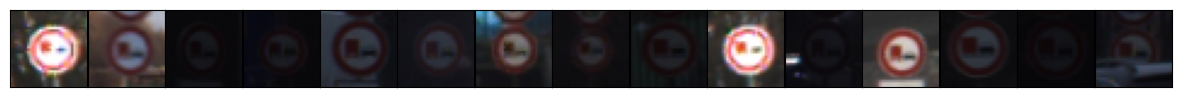

----------------------------------------------------------------------------

11. Right-of-way at the next intersection - Samples: 1170


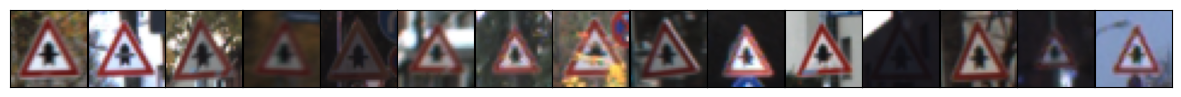

----------------------------------------------------------------------------

12. Priority road - Samples: 1890


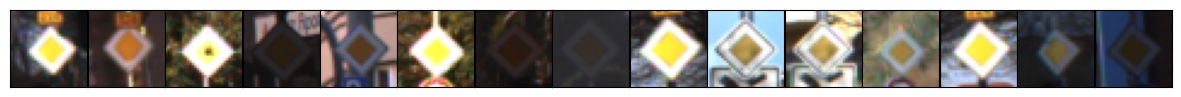

----------------------------------------------------------------------------

13. Yield - Samples: 1920


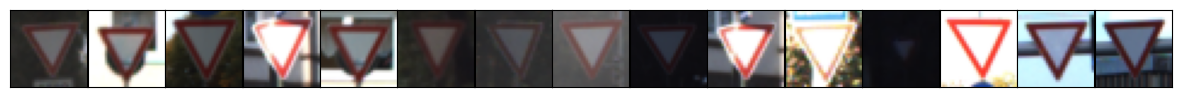

----------------------------------------------------------------------------

14. Stop - Samples: 690


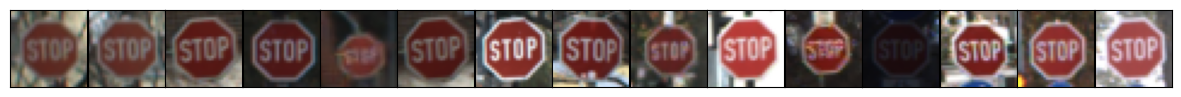

----------------------------------------------------------------------------

15. No vehicles - Samples: 540


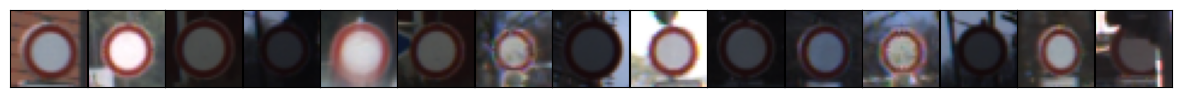

----------------------------------------------------------------------------

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


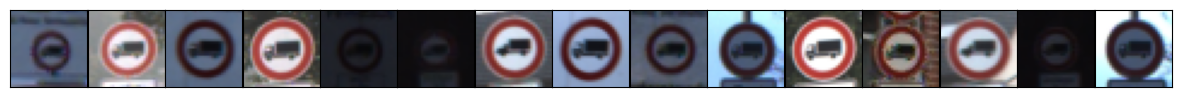

----------------------------------------------------------------------------

17. No entry - Samples: 990


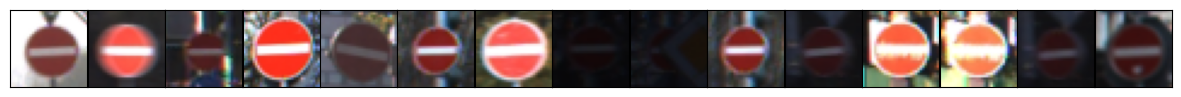

----------------------------------------------------------------------------

18. General caution - Samples: 1080


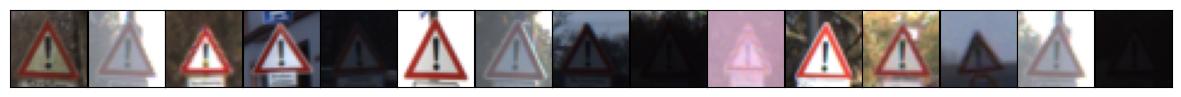

----------------------------------------------------------------------------

19. Dangerous curve to the left - Samples: 180


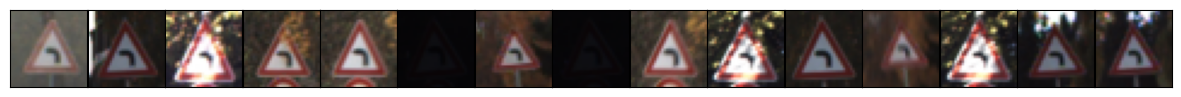

----------------------------------------------------------------------------

20. Dangerous curve to the right - Samples: 300


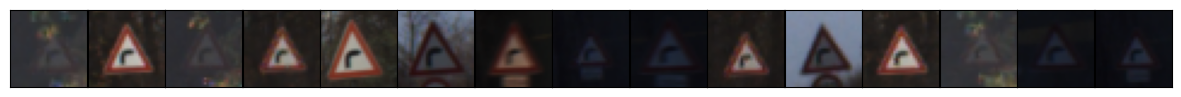

----------------------------------------------------------------------------

21. Double curve - Samples: 270


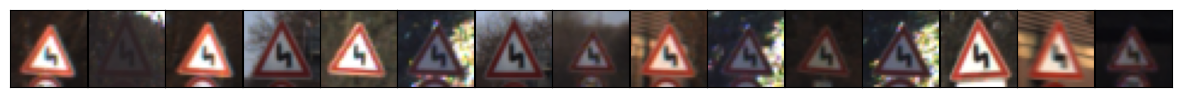

----------------------------------------------------------------------------

22. Bumpy road - Samples: 330


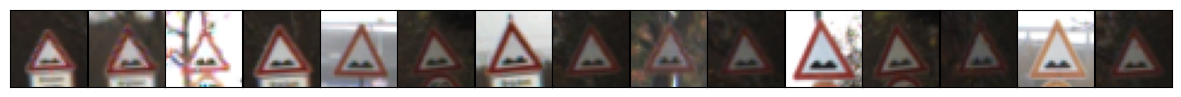

----------------------------------------------------------------------------

23. Slippery road - Samples: 450


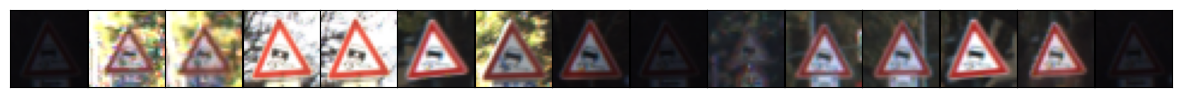

----------------------------------------------------------------------------

24. Road narrows on the right - Samples: 240


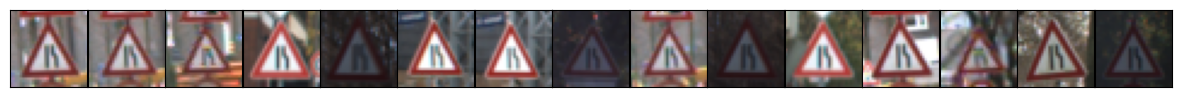

----------------------------------------------------------------------------

25. Road work - Samples: 1350


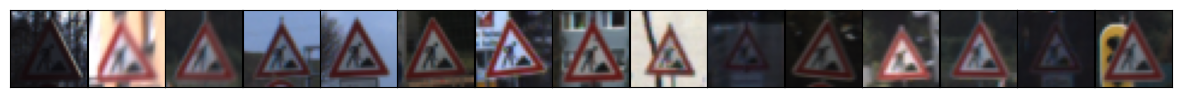

----------------------------------------------------------------------------

26. Traffic signals - Samples: 540


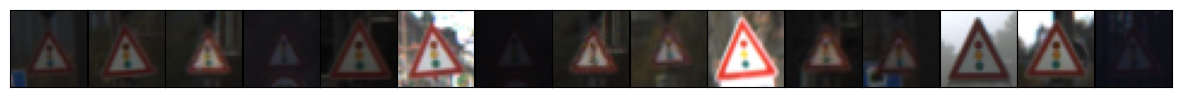

----------------------------------------------------------------------------

27. Pedestrians - Samples: 210


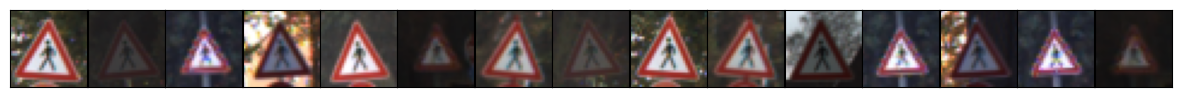

----------------------------------------------------------------------------

28. Children crossing - Samples: 480


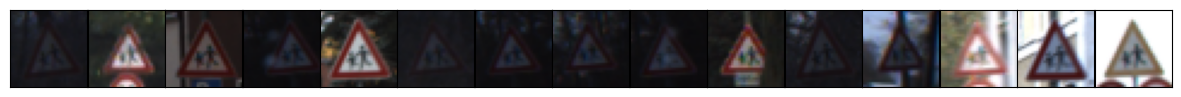

----------------------------------------------------------------------------

29. Bicycles crossing - Samples: 240


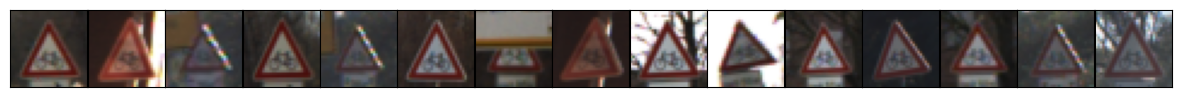

----------------------------------------------------------------------------

30. Beware of ice/snow - Samples: 390


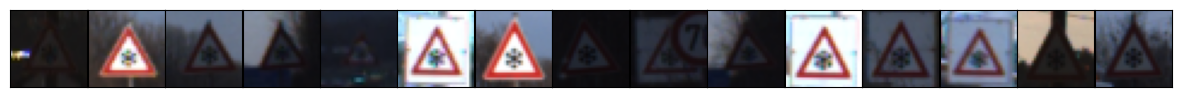

----------------------------------------------------------------------------

31. Wild animals crossing - Samples: 690


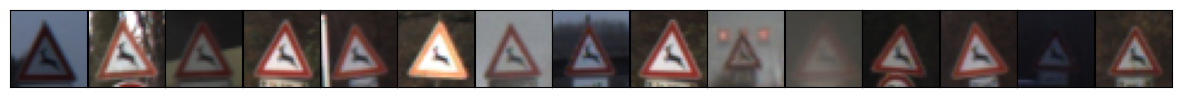

----------------------------------------------------------------------------

32. End of all speed and passing limits - Samples: 210


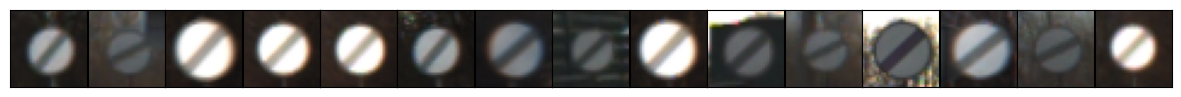

----------------------------------------------------------------------------

33. Turn right ahead - Samples: 599


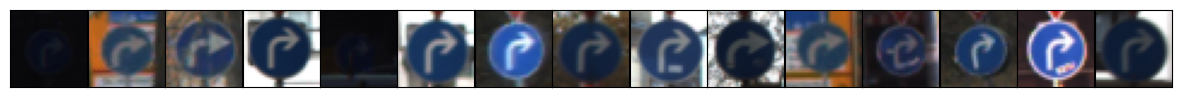

----------------------------------------------------------------------------

34. Turn left ahead - Samples: 360


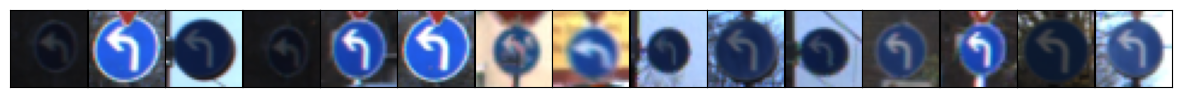

----------------------------------------------------------------------------

35. Ahead only - Samples: 1080


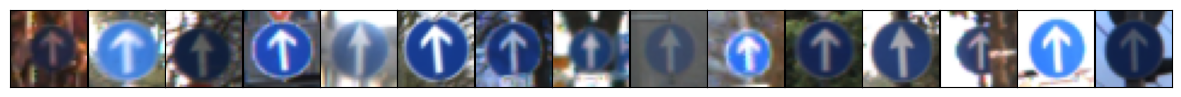

----------------------------------------------------------------------------

36. Go straight or right - Samples: 330


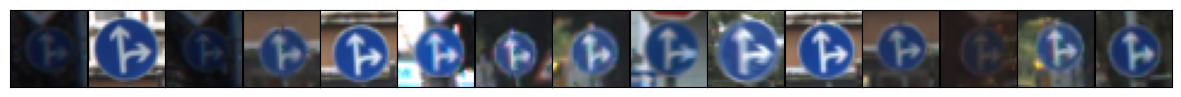

----------------------------------------------------------------------------

37. Go straight or left - Samples: 180


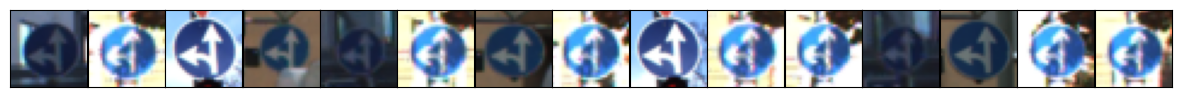

----------------------------------------------------------------------------

38. Keep right - Samples: 1860


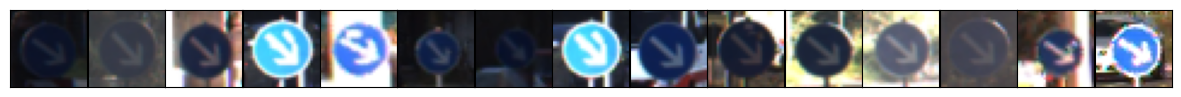

----------------------------------------------------------------------------

39. Keep left - Samples: 270


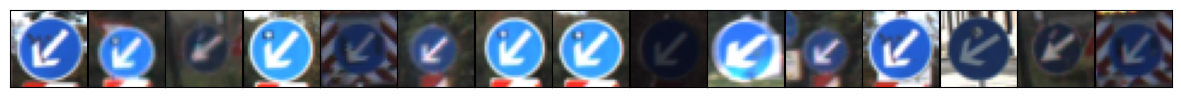

----------------------------------------------------------------------------

40. Roundabout mandatory - Samples: 300


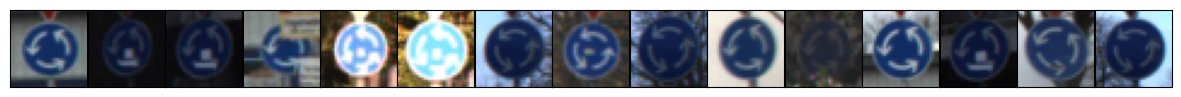

----------------------------------------------------------------------------

41. End of no passing - Samples: 210


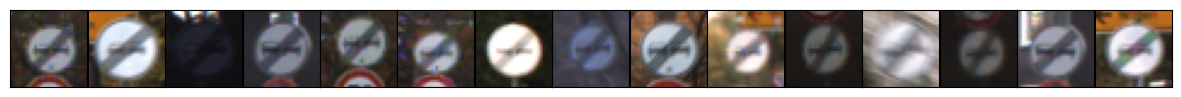

----------------------------------------------------------------------------

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


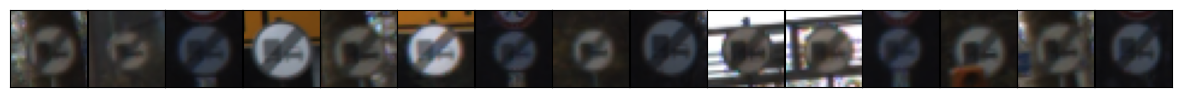

----------------------------------------------------------------------------



In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

def getSignNames():
    return pd.read_csv('/content/drive/MyDrive/TrafficSign Classifier Project/signnames.csv').values

def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        print("----------------------------------------------------------------------------\n")

plotImages(X_train, y_train)

In [8]:
!pip install opencv-python

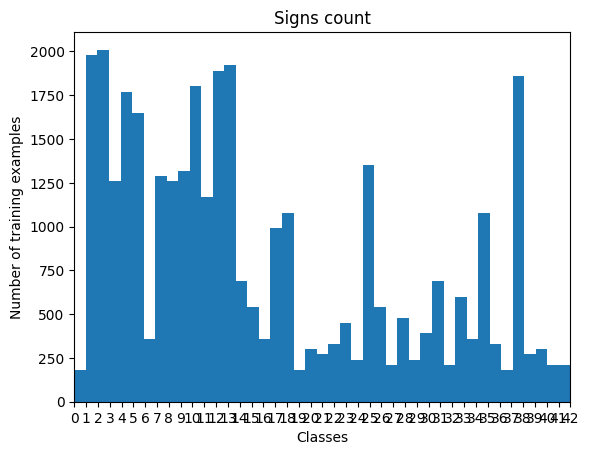

['1-Speed limit (20km/h)', '2-Speed limit (30km/h)', '3-Speed limit (50km/h)', '4-Speed limit (60km/h)', '5-Speed limit (70km/h)', '6-Speed limit (80km/h)', '7-End of speed limit (80km/h)', '8-Speed limit (100km/h)', '9-Speed limit (120km/h)', '10-No passing', '11-No passing for vehicles over 3.5 metric tons', '12-Right-of-way at the next intersection', '13-Priority road', '14-Yield', '15-Stop', '16-No vehicles', '17-Vehicles over 3.5 metric tons prohibited', '18-No entry', '19-General caution', '20-Dangerous curve to the left', '21-Dangerous curve to the right', '22-Double curve', '23-Bumpy road', '24-Slippery road', '25-Road narrows on the right', '26-Road work', '27-Traffic signals', '28-Pedestrians', '29-Children crossing', '30-Bicycles crossing', '31-Beware of ice/snow', '32-Wild animals crossing', '33-End of all speed and passing limits', '34-Turn right ahead', '35-Turn left ahead', '36-Ahead only', '37-Go straight or right', '38-Go straight or left', '39-Keep right', '40-Keep le

In [10]:
# plot the histogram
signsCount = list(signsDicts.values())
fig, ax = plt.subplots()
y_pos = np.arange(len(signsCount))
ax.set_ylabel('Number of training examples')
ax.set_title('Signs count')
ax.set_xlabel('Classes')
ax.set_xticks(y_pos)
plt.hist(y_train, bins = n_classes)
plt.xlim([0, 42])
plt.show()

def getSignNamesData():
    return pd.read_csv('/content/drive/MyDrive/TrafficSign Classifier Project/signnames.csv').values
    #return pd.read_csv('./signnames.csv').as_matrix()

signsNamesData = getSignNamesData()
signNames = []
i=0
for sign in signsNamesData:
    i=i+1
    signNames.append(str(i)+'-'+sign[1])
print(signNames)

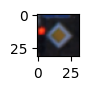

13-Priority road


In [11]:
index = random.randint(3, len(X_train))
X_train_cnt=len(X_train)
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.tight_layout()
plt.show()
print(signNames[y_train[index]])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission.

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [15]:
grayconversion_train = tf.image.rgb_to_grayscale(X_train)
with tf.Session() as sess:
    grayscale_train = sess.run(grayconversion_train)
grayconversion_valid = tf.image.rgb_to_grayscale(X_valid)
with tf.Session() as sess:
    grayscale_valid = sess.run(grayconversion_valid)
grayconversion_test = tf.image.rgb_to_grayscale(X_test)
with tf.Session() as sess:
    grayscale_test = sess.run(grayconversion_test)

X_train_all = np.append(X_train,grayscale_train,axis=3)
X_test_all = np.append(X_test,grayscale_test,axis=3)
X_valid_all = np.append(X_valid,grayscale_valid,axis=3)
print(X_train_all.shape)
print(X_valid_all.shape)
print(X_test_all.shape)

(34799, 32, 32, 4)
(4410, 32, 32, 4)
(12630, 32, 32, 4)


### Model Architecture

In [18]:
!pip3 install tensorflow==1.14.0

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==1.14.0


In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
# from tensorflow.contrib.layers import flatten
EPOCHS = 20
BATCH_SIZE = 256
keep_prob = tf.placeholder("float")
mu = 0
sigma = 0.05
conv1_W = tf.Variable(tf.truncated_normal(shape=(3,3,3,24), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(24))
conv2_W = tf.Variable(tf.truncated_normal(shape=(3,3,24,32), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(32))
conv3_W = tf.Variable(tf.truncated_normal(shape=(3,3,32,64), mean = mu, stddev = sigma))
conv3_b = tf.Variable(tf.zeros(64))
conv1_Wg = tf.Variable(tf.truncated_normal(shape=(3,3,1,24), mean = mu, stddev = sigma))
conv1_bg = tf.Variable(tf.zeros(24))
conv2_Wg = tf.Variable(tf.truncated_normal(shape=(3,3,24,32), mean = mu, stddev = sigma))
conv2_bg = tf.Variable(tf.zeros(32))
conv3_Wg = tf.Variable(tf.truncated_normal(shape=(3,3,32,64), mean = mu, stddev = sigma))
conv3_bg = tf.Variable(tf.zeros(64))
fc1_W = tf.Variable(tf.truncated_normal(shape=(2816,352), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(352))
fc2_W  = tf.Variable(tf.truncated_normal(shape=(352,176), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(176))
fc3_W  = tf.Variable(tf.truncated_normal(shape=(176,n_classes), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(n_classes))

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    x_color = x[:,:,:,0:3]
    x_gray = x[:,:,:,2:3]
    conv1 = tf.nn.conv2d(x_color, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv1g = tf.nn.conv2d(x_gray, conv1_Wg, strides=[1, 1, 1, 1], padding='VALID') + conv1_bg
    conv1g = tf.nn.relu(conv1g)
    conv1g = tf.nn.max_pool(conv1g, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv2g = tf.nn.conv2d(conv1g, conv2_Wg, strides=[1, 1, 1, 1], padding='VALID') + conv2_bg
    conv2g = tf.nn.relu(conv2g)
    conv2g = tf.nn.max_pool(conv2g, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    conv3g = tf.nn.conv2d(conv2g, conv3_Wg, strides=[1, 1, 1, 1], padding='VALID') + conv3_bg
    conv3g = tf.nn.relu(conv3g)
    conv3g = tf.nn.max_pool(conv3g, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    fc3 = tf.keras.layers.Flatten()(conv3)
    fc2 = tf.keras.layers.Flatten()(conv2)
    fc3g = tf.keras.layers.Flatten()(conv3g)
    fc2g = tf.keras.layers.Flatten()(conv2g)

    fc0   = tf.concat([fc3, fc2, fc3g, fc2g],1)


    # fc0   = tf.concat([flatten(conv3),flatten(conv2),flatten(conv3g),flatten(conv2g)],1)
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [22]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected,
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 4))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
rate = 0.001
beta = 0.001
logits = LeNet(x)
softmaxoutputs = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy + beta*tf.nn.l2_loss(conv1_W) + beta*tf.nn.l2_loss(conv2_W) + \
    beta*tf.nn.l2_loss(conv3_W) + beta*tf.nn.l2_loss(conv1_Wg) + beta*tf.nn.l2_loss(conv2_Wg) + \
    beta*tf.nn.l2_loss(conv3_Wg) + beta*tf.nn.l2_loss(fc1_W) + beta*tf.nn.l2_loss(fc2_W) + beta*tf.nn.l2_loss(fc3_W))
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation= tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))

    return total_accuracy / num_examples

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_all)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_all, y_train = shuffle(X_train_all, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_all[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.5})
            #print(tf.trainable_variables() )

        training_accuracy = evaluate(X_train_all, y_train)
        validation_accuracy = evaluate(X_valid_all, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './savefile')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.763
Validation Accuracy = 0.702

EPOCH 2 ...
Training Accuracy = 0.947
Validation Accuracy = 0.898

EPOCH 3 ...
Training Accuracy = 0.982
Validation Accuracy = 0.946

EPOCH 4 ...
Training Accuracy = 0.987
Validation Accuracy = 0.950

EPOCH 5 ...
Training Accuracy = 0.991
Validation Accuracy = 0.957

EPOCH 6 ...
Training Accuracy = 0.993
Validation Accuracy = 0.969

EPOCH 7 ...
Training Accuracy = 0.996
Validation Accuracy = 0.965

EPOCH 8 ...
Training Accuracy = 0.997
Validation Accuracy = 0.975

EPOCH 9 ...
Training Accuracy = 0.997
Validation Accuracy = 0.963

EPOCH 10 ...
Training Accuracy = 0.998
Validation Accuracy = 0.976

EPOCH 11 ...
Training Accuracy = 0.998
Validation Accuracy = 0.972

EPOCH 12 ...
Training Accuracy = 0.998
Validation Accuracy = 0.969

EPOCH 13 ...
Training Accuracy = 0.999
Validation Accuracy = 0.978

EPOCH 14 ...
Training Accuracy = 0.999
Validation Accuracy = 0.979

EPOCH 15 ...
Training Accuracy = 0.999
Valid

In [25]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_all, y_test)

print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.959


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

18-No entry
(32, 32, 3)


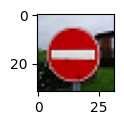

13-Priority road
(32, 32, 3)


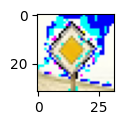

15-Stop
(32, 32, 3)


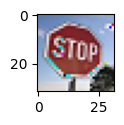

12-Right-of-way at the next intersection
(32, 32, 3)


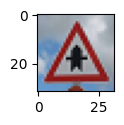

39-Keep right
(32, 32, 3)


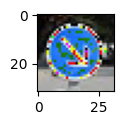

5-Speed limit (70km/h)
(32, 32, 3)


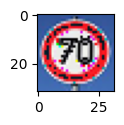

36-Ahead only
(32, 32, 3)


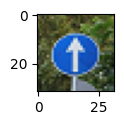

34-Turn right ahead
(32, 32, 3)


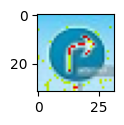

26-Road work
(32, 32, 3)


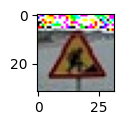

14-Yield
(32, 32, 3)


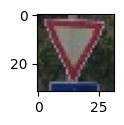

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
NImages = 10
X_real = np.zeros((NImages,32,32,3)).astype(np.uint8)
y_real = np.array([17,12,14,11,38,4,35,33,25,13])
for i in range(NImages):
    image = mpimg.imread('/content/drive/MyDrive/TrafficSign Classifier Project/testImages/'+str(i+1)+'.png')
    image = np.multiply(image,256).astype(np.uint8)[:,:,0:3]
    X_real[i] = image
    print(signNames[y_real[i]])
    print(X_real[i].shape)
    plt.figure(figsize=(1,1))
    plt.imshow(X_real[i])
    plt.show()

In [29]:
grayconversion_real = tf.image.rgb_to_grayscale(X_real)
with tf.Session() as sess:
    grayscale_real = sess.run(grayconversion_real)
print(grayscale_real.shape)
X_real_all = np.append(X_real,grayscale_real,axis=3)
print(X_real_all.shape)

(10, 32, 32, 1)
(10, 32, 32, 4)


### Predict the Sign Type for Each Image

In [30]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def predict_test(X_data, y_data):
    sess = tf.get_default_session()
    prediction = sess.run(tf.argmax(logits,1), feed_dict={x: X_data, y: y_data ,keep_prob : 1.0})
    prediction = sess.run(tf.nn.top_k(softmaxoutputs,k=5), feed_dict={x: X_data, y: y_data ,keep_prob : 1.0})
    #print(prediction)
    return prediction

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = predict_test(X_real_all, y_real)

<Figure size 640x480 with 0 Axes>

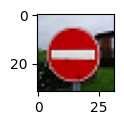

True: 18-No entry
Predicted: 18-No entry


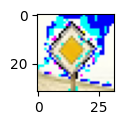

True: 13-Priority road
Predicted: 13-Priority road


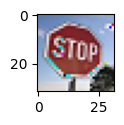

True: 15-Stop
Predicted: 15-Stop


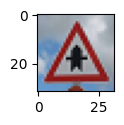

True: 12-Right-of-way at the next intersection
Predicted: 12-Right-of-way at the next intersection


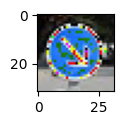

True: 39-Keep right
Predicted: 39-Keep right


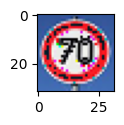

True: 5-Speed limit (70km/h)
Predicted: 5-Speed limit (70km/h)


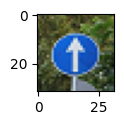

True: 36-Ahead only
Predicted: 36-Ahead only


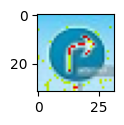

True: 34-Turn right ahead
Predicted: 34-Turn right ahead


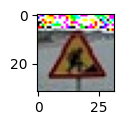

True: 26-Road work
Predicted: 13-Priority road


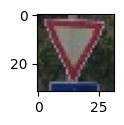

True: 14-Yield
Predicted: 14-Yield


In [31]:
plt.clf()
for index in range(NImages):
    #index = 0
    image = X_real[index,:,:,0:3].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    print("True: " + signNames[y_real[index]])
    print("Predicted: " + signNames[predictions.indices[index][0]])

### Analyze Performance

In [32]:
### Calculate the accuracy for these 5 new images.
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = 0
for i in range(NImages):
    #print(y_real[i])
    #print(predictions.indices[i,0])
    if y_real[i] == predictions.indices[i,0]:
        accuracy = accuracy + 1

accuracy = accuracy/NImages
print(accuracy)

0.9


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here.

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

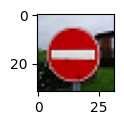

18-No entry-----------values:0.99999994
15-Stop-----------values:1.7298639e-14
27-Traffic signals-----------values:4.1050404e-16
14-Yield-----------values:3.1643219e-16
33-End of all speed and passing limits-----------values:7.929378e-17


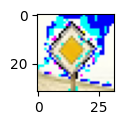

13-Priority road-----------values:0.99999994
11-No passing for vehicles over 3.5 metric tons-----------values:3.6295306e-17
12-Right-of-way at the next intersection-----------values:1.5523354e-18
26-Road work-----------values:8.676477e-19
43-End of no passing by vehicles over 3.5 metric tons-----------values:1.071377e-19


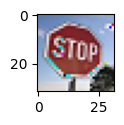

15-Stop-----------values:0.9999252
18-No entry-----------values:7.069525e-05
2-Speed limit (30km/h)-----------values:1.2916701e-06
14-Yield-----------values:9.01743e-07
25-Road narrows on the right-----------values:4.4845228e-07


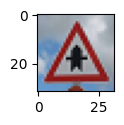

12-Right-of-way at the next intersection-----------values:0.9999983
31-Beware of ice/snow-----------values:1.2580679e-06
28-Pedestrians-----------values:2.4149924e-07
27-Traffic signals-----------values:1.2018215e-07
13-Priority road-----------values:7.5779866e-08


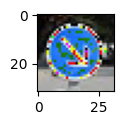

39-Keep right-----------values:0.9997046
41-Roundabout mandatory-----------values:0.00021093745
37-Go straight or right-----------values:2.3979548e-05
40-Keep left-----------values:1.662086e-05
38-Go straight or left-----------values:1.4909958e-05


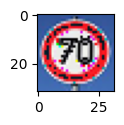

5-Speed limit (70km/h)-----------values:0.67124784
1-Speed limit (20km/h)-----------values:0.17252384
34-Turn right ahead-----------values:0.051162954
2-Speed limit (30km/h)-----------values:0.039221313
15-Stop-----------values:0.02049609


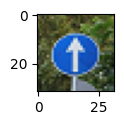

36-Ahead only-----------values:0.99999994
35-Turn left ahead-----------values:3.2479618e-12
37-Go straight or right-----------values:1.3660572e-13
34-Turn right ahead-----------values:7.664875e-14
38-Go straight or left-----------values:1.4402203e-14


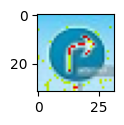

34-Turn right ahead-----------values:0.9995608
40-Keep left-----------values:0.00041719002
41-Roundabout mandatory-----------values:2.0121142e-05
36-Ahead only-----------values:1.43309e-06
38-Go straight or left-----------values:3.7701997e-07


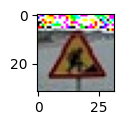

13-Priority road-----------values:0.2788652
12-Right-of-way at the next intersection-----------values:0.22897217
15-Stop-----------values:0.14416362
26-Road work-----------values:0.07096301
11-No passing for vehicles over 3.5 metric tons-----------values:0.03895645


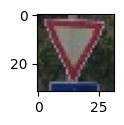

14-Yield-----------values:0.9999999
18-No entry-----------values:4.8665147e-08
36-Ahead only-----------values:4.2002423e-08
13-Priority road-----------values:3.0930323e-08
16-No vehicles-----------values:1.2410114e-08


In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web.
### Feel free to use as many code cells as needed.
for index in range(NImages):
    image = X_real_all[index,:,:,0:3].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    for i in range(predictions.indices[index].shape[0]):
        probvalue = predictions.values[index][i]
        print(signNames[predictions.indices[index][i]] + '-----------values:' + str(probvalue))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p>
 <p style="text-align: center;"> Your output should look something like this (above)</p>
 </figcaption>
</figure>
 <p></p>


In [34]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [35]:
def conv_layer(x):
    x_color = x[:,:,:,0:3]
    x_gray = x[:,:,:,2:3]
    conv1 = tf.nn.conv2d(x_color, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1g = tf.nn.conv2d(x_gray, conv1_Wg, strides=[1, 1, 1, 1], padding='VALID') + conv1_bg
    conv1g = tf.nn.relu(conv1g)
    conv1g = tf.nn.max_pool(conv1g, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2g = tf.nn.conv2d(conv1g, conv2_Wg, strides=[1, 1, 1, 1], padding='VALID') + conv2_bg
    conv2g = tf.nn.relu(conv2g)
    conv2g = tf.nn.max_pool(conv2g, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3g = tf.nn.conv2d(conv2g, conv3_Wg, strides=[1, 1, 1, 1], padding='VALID') + conv3_bg
    conv3g = tf.nn.relu(conv3g)
    conv3g = tf.nn.max_pool(conv3g, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    return conv1g

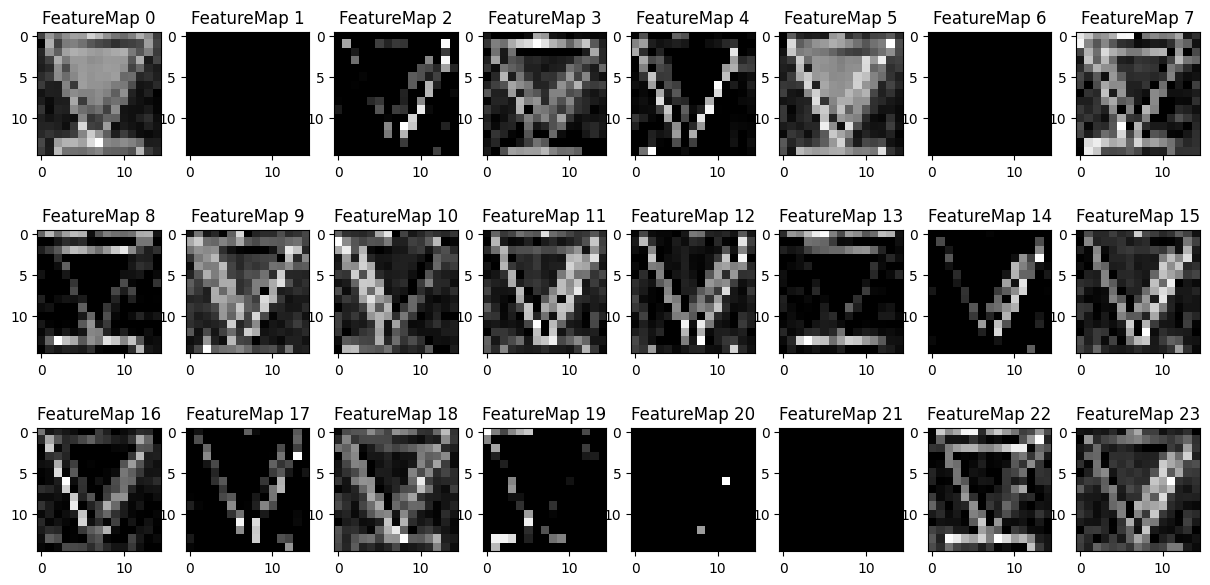

In [36]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap([X_real_all[9]], conv_layer(x))

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file.